### Importación de Librerías

In [149]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets

warnings.filterwarnings("ignore")
plt.style.use('seaborn')
px.defaults.template = "ggplot2"
#plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

### Leer el Dataframe

In [2]:
# Obtención de la ruta
actual_dir = os.getcwd()
ext_dir = os.path.dirname(actual_dir)
subdir = '/descarga/data/Municipios/Municipios_Clean/'
dir = ext_dir + subdir

In [63]:
df = pd.read_csv(dir + 'Data_Climatic_Municipios_Clean.csv', low_memory=False)
df.sort_values(by=['Año','Mes','Día','Estado_CVE', 'Municipio_CVE'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Estado,Municipio,Estado_CVE,Municipio_CVE,Año,Mes,Día,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
0,Aguascalientes,Aguascalientes,1,1,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
1,Aguascalientes,Asientos,1,2,2020,1,1,12.91,23.01,6.02,12.88,19.87,7.19,7.03,9.95,78.76,5.12,69.81,13.81
2,Aguascalientes,Calvillo,1,3,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
3,Aguascalientes,Cosío,1,4,2020,1,1,12.03,21.56,5.61,11.83,18.49,6.46,6.87,9.36,77.65,6.20,73.94,9.15
4,Aguascalientes,Jesús María,1,5,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441195,Zacatecas,Villa Hidalgo,32,54,2023,10,31,15.41,26.25,8.85,13.67,20.40,8.55,9.00,11.33,79.10,2.77,75.62,1.87
3441196,Zacatecas,Villanueva,32,55,2023,10,31,17.53,29.22,9.80,16.14,22.72,9.83,10.43,13.28,79.32,2.34,71.25,3.85
3441197,Zacatecas,Zacatecas,32,56,2023,10,31,16.23,27.09,9.41,14.58,21.00,9.33,9.26,11.92,78.10,2.77,72.56,4.25
3441198,Zacatecas,Trancoso,32,57,2023,10,31,15.38,25.62,8.01,13.65,19.69,7.90,8.38,11.02,79.13,3.32,72.31,1.38


### Creacion de DataFrame a nivel Estatal inferido de los datos municipales 

De acuerdo a las necesidades del cliente, el equipo llego a la conclusion de que la mejor manera de trabajar con los datos climaticos es a nivel estatal, por lo que se creo un DataFrame a nivel estatal con los datos de los municipios.

In [4]:
### Crea Dataframe Estatal inferido a partir del Municipal
df_estatal = df.groupby(['Año','Mes','Estado', 'Estado_CVE']).mean().reset_index()
df_estatal.drop(columns=['Municipio_CVE','Día'], inplace=True)
df_estatal

,Año,Mes,Estado,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
0,2020,1,Aguascalientes,1,11.871672,24.617947,3.252815,11.622434,19.955865,4.849208,2.336100,6.980059,79.269296,2.306334,59.219238,0.836100
1,2020,1,Baja California,2,11.503548,21.848387,5.296516,12.156581,19.138839,7.561161,3.232000,7.694516,96.414323,2.328968,60.059871,0.225097
2,2020,1,Baja California Sur,3,18.086452,27.860968,12.222968,17.575806,24.043097,13.045290,10.594581,14.085290,99.619742,2.680968,67.542323,0.050258
3,2020,1,Campeche,4,24.531466,30.339472,20.069032,24.493050,30.125425,19.977243,18.949589,21.721496,100.730762,0.696833,73.750880,1.040616
4,2020,1,Chiapas,7,20.458480,27.968901,15.246714,20.349943,26.273483,15.924568,16.362354,18.356055,91.695314,1.527048,80.520960,1.351758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2023,10,Tamaulipas,28,25.542873,35.266069,19.147674,24.547022,30.963188,19.681215,17.522588,21.035079,96.205454,2.576077,68.954276,2.814044
1468,2023,10,Tlaxcala,29,15.290113,23.650790,9.515000,14.971597,20.815581,10.438403,11.728065,13.349629,76.623823,1.711016,83.134355,10.307129
1469,2023,10,Veracruz,30,24.580210,31.172556,20.226730,24.134035,28.654913,20.827220,20.242191,22.187728,93.911541,2.264079,80.661794,8.900584
1470,2023,10,Yucatán,31,27.839565,32.797638,24.157495,27.691656,32.443996,24.111659,23.106765,25.399595,100.892797,0.607775,78.530797,2.573174


In [9]:
columnas_numericas = ['Temp_Superficial','Temp_Superficial_MAX','Temp_Superficial_MIN','Temp_2_Metros','Temp_2_Metros_MAX','Temp_2_Metros_MIN','Temp_2_Metros_Pto_Congelación','Temp_2_Metros_Pto_Húmedo','Presión_Superficial','Velocidad_Viento','Humedad_Relativa','Precipitacion']
df_estatal[columnas_numericas].describe()

,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,22.013029,32.859709,14.363630,21.124783,28.166155,15.455790,11.776865,16.450818,88.734345,1.847348,62.334582,2.580671
std,5.073739,5.209239,6.225044,4.753899,4.184188,5.586824,7.225245,5.604649,7.800812,0.611161,15.394474,3.276291
min,7.305806,18.892065,-1.774579,7.814299,16.196774,0.802412,-9.865272,0.272277,75.433460,0.411409,20.651204,0.000000
25%,18.519838,29.085022,9.695081,17.776948,25.245562,11.191272,6.314761,12.428520,82.348073,1.418371,50.891138,0.269087
50%,22.347306,31.934887,14.125348,21.191541,28.139136,15.241894,12.027976,16.527848,89.302300,1.815252,62.217004,1.225591
75%,25.818232,36.784256,19.421538,24.674445,31.068161,19.970326,17.346413,21.196055,94.741315,2.275370,75.236117,3.886939
max,33.525097,46.667226,26.960485,31.925758,39.203212,27.030588,25.926727,27.158328,101.463470,3.633549,92.658999,28.186566


In [6]:
df_estatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Año                            1472 non-null   int64  
 1   Mes                            1472 non-null   int64  
 2   Estado                         1472 non-null   object 
 3   Estado_CVE                     1472 non-null   int64  
 4   Temp_Superficial               1472 non-null   float64
 5   Temp_Superficial_MAX           1472 non-null   float64
 6   Temp_Superficial_MIN           1472 non-null   float64
 7   Temp_2_Metros                  1472 non-null   float64
 8   Temp_2_Metros_MAX              1472 non-null   float64
 9   Temp_2_Metros_MIN              1472 non-null   float64
 10  Temp_2_Metros_Pto_Congelación  1472 non-null   float64
 11  Temp_2_Metros_Pto_Húmedo       1472 non-null   float64
 12  Presión_Superficial            1472 non-null   f

array([[<AxesSubplot: title={'center': 'Temp_Superficial'}>,
        <AxesSubplot: title={'center': 'Temp_Superficial_MAX'}>,
        <AxesSubplot: title={'center': 'Temp_Superficial_MIN'}>],
       [<AxesSubplot: title={'center': 'Temp_2_Metros'}>,
        <AxesSubplot: title={'center': 'Temp_2_Metros_MAX'}>,
        <AxesSubplot: title={'center': 'Temp_2_Metros_MIN'}>],
       [<AxesSubplot: title={'center': 'Temp_2_Metros_Pto_Congelación'}>,
        <AxesSubplot: title={'center': 'Temp_2_Metros_Pto_Húmedo'}>,
        <AxesSubplot: title={'center': 'Presión_Superficial'}>],
       [<AxesSubplot: title={'center': 'Velocidad_Viento'}>,
        <AxesSubplot: title={'center': 'Humedad_Relativa'}>,
        <AxesSubplot: title={'center': 'Precipitacion'}>]], dtype=object)

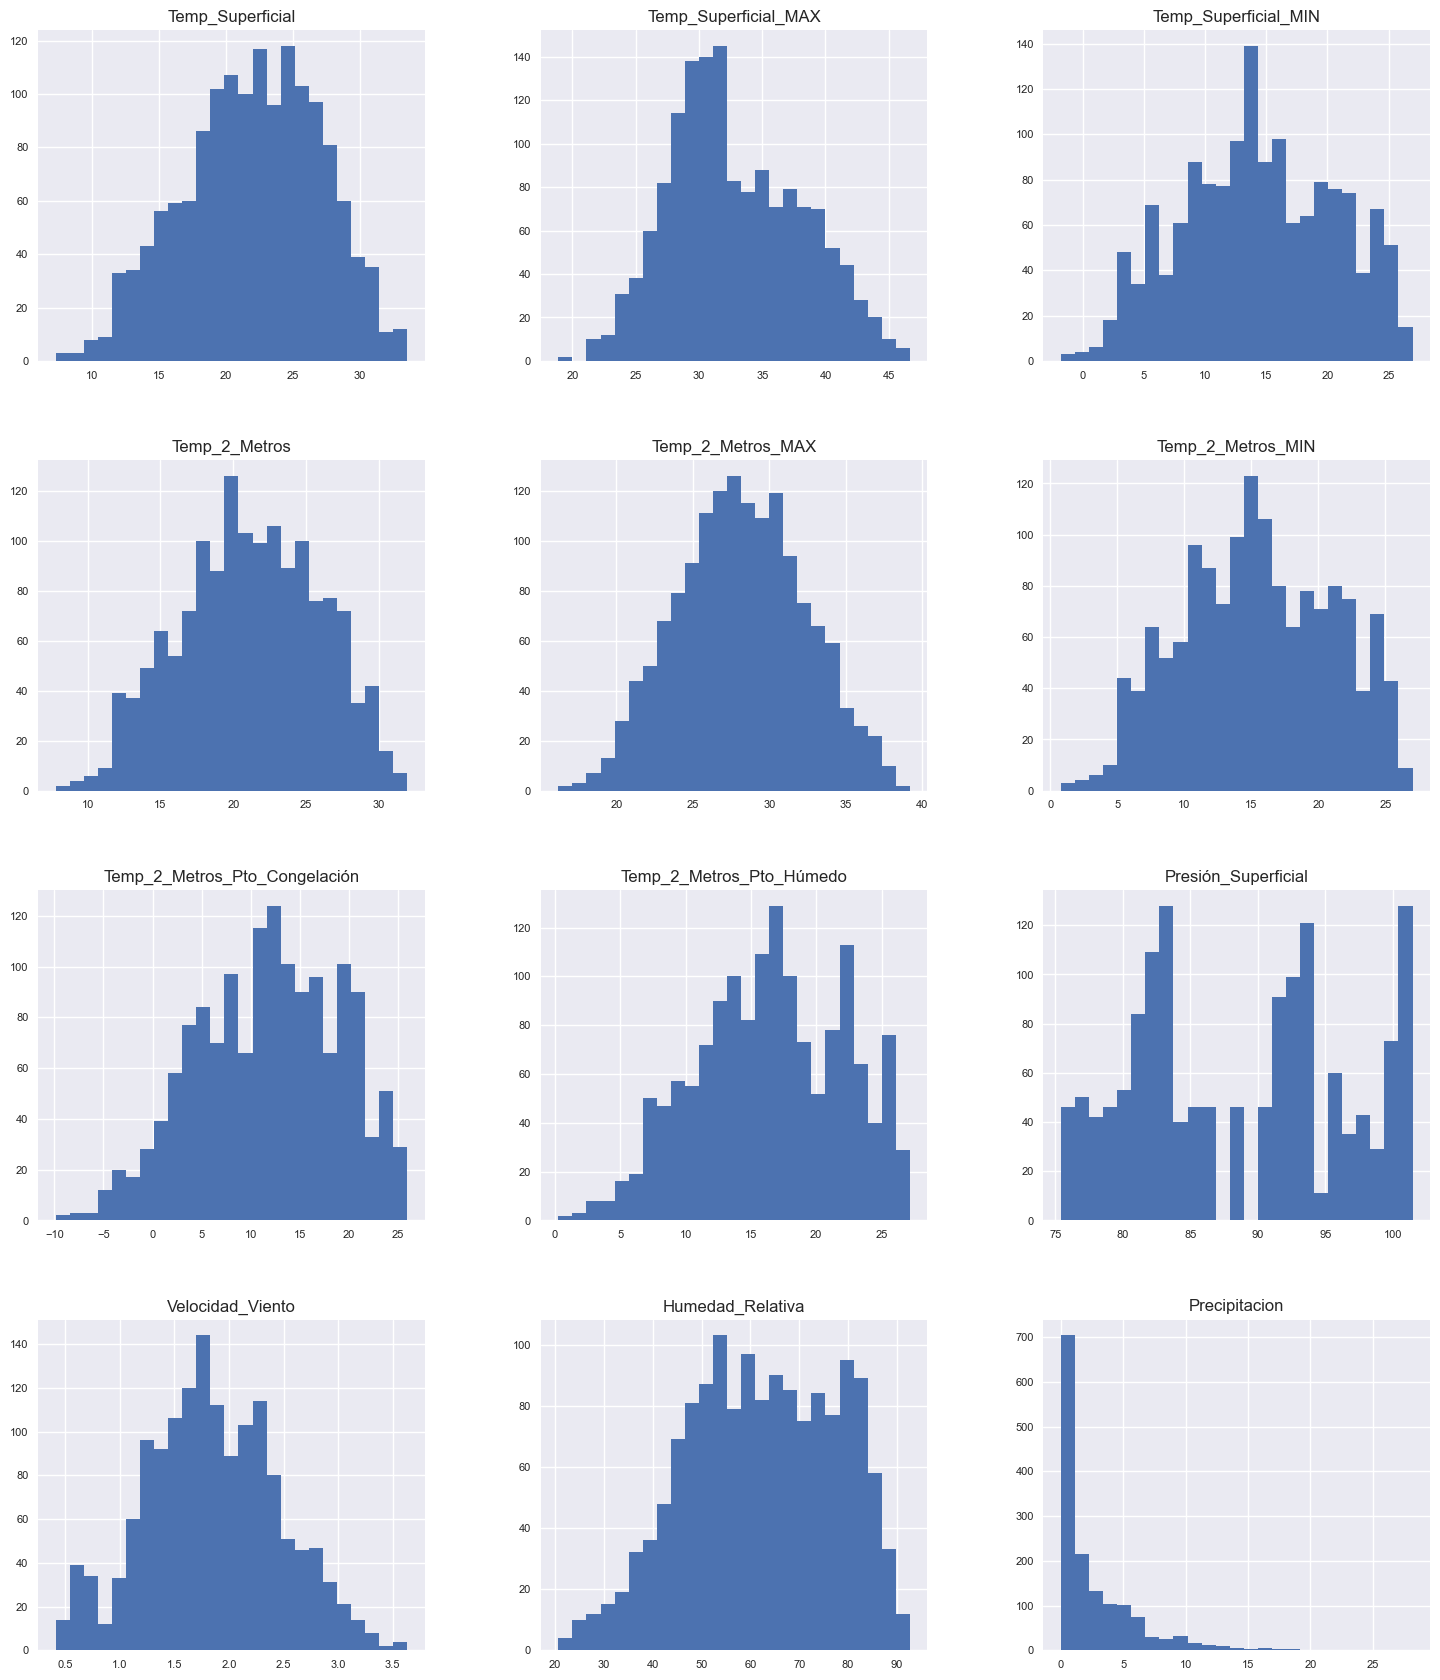

In [150]:
df_estatal[columnas_numericas].hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8)

In [159]:
def ploting(Variable):
    # Plot each year's time series in its own facet
    g = sns.relplot(
        data=df_estatal,
        x="Mes", y=Variable, col="Año", hue='Estado',
        kind="line", palette="husl", linewidth=2, zorder=5,
        col_wrap=4, height=5, aspect=2, legend=True,
    )

    # Iterate over each subplot to customize further
    for year, ax in g.axes_dict.items():

        # Add the title as an annotation within the plot
        ax.text(.9, .85, year, transform=ax.transAxes, fontweight="bold")


    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])

    # Tweak the supporting aspects of the plot
    g.set_titles(Variable)
    g.set_axis_labels("Mes", "")
    g.tight_layout()

In [160]:
widgets.interact(ploting, Variable=columnas_numericas)

interactive(children=(Dropdown(description='Variable', options=('Temp_Superficial', 'Temp_Superficial_MAX', 'T…

<function __main__.ploting(Variable)>

In [161]:
def plotting_plotly(Variable):    
    fig = px.line(df_estatal, x='Mes', y=Variable, color='Estado', facet_col='Año',
                labels={'Mes': 'Meses'}
                )

    # Ajustar las características del gráfico
    fig.update_layout(height=500, width=2100, title_x=0.5)
    fig.update_xaxes(tickangle=45, tickmode='array', tickvals=[1,2,3,4,5,6,7,8,9,10,11,12], ticktext=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    fig.show()

widgets.interact(plotting_plotly, Variable=columnas_numericas)

interactive(children=(Dropdown(description='Variable', options=('Temp_Superficial', 'Temp_Superficial_MAX', 'T…

<function __main__.plotting_plotly(Variable)>

In [ ]:
columnas_numericas = df_estatal.select_dtypes(include=[np.number]).columns # Seleccionar solo las columnas numéricas
df_estatal[columnas_numericas] = df_estatal[columnas_numericas].round(2) # Redondear las columnas numéricas a dos decimales

print(df_estatal.shape)
#df_estatal1.to_csv('data/Estados/Data_Climatic_Estados_Inferido.csv', index=False)
df_estatal
